In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.io.fits as fits
from scipy.stats import gaussian_kde

In [3]:
def plot_contour(xdata, ydata, c="k", nlevels=3, ax=None):
    if ax is None:
        ax = plt.gca()
    xmin, xmax = xdata.min(), xdata.max()
    ymin, ymax = ydata.min(), ydata.max()
    X, Y = np.mgrid[xmin:xmax:1000j, ymin:ymax:1000j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([xdata, ydata])
    kernel = gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    
    #ax.contour(X, Y, Z, levels=nlevels, linewidths=1.5, colors=c)
    levels = ax.contour(X, Y, Z, levels=nlevels, linewidths=1.5, colors=c).levels
    
    for i in range(len(xdata)):
        #These are the indices of the ith's point location in Z (the density estimation) - probably the only tricky part about this
        xind = abs(X[:,0] - positions[0, abs(positions[0] - xdata[i]).argmin()]).argmin()
        yind = abs(Y[0,:] - positions[1, abs(positions[1] - ydata[i]).argmin()]).argmin()
        
        if Z[xind,yind] < levels[1]: #Plot the scatter point if it's below outermost contour level
            ax.scatter(xdata[i], ydata[i], color=c, s=10)

In [4]:
from astropy.table import Table
df = Table.read('/Users/Trevor1/Desktop/data/files/catalogs/AllXrayDataGTR_matchwith_Rankine20_CIV_HeII_wDelGI_wCIVDist_4Latent_Jul0621.fits', format='fits')
dat = df.to_pandas()
dat.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: TableReplaceWarning: converted column 'Data_source' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,SDSS,LOGEDD_RATIO,Gamma,f2keV_ergs,L2500,Alpha_ox,Delta_Alpha_ox,New_Delta_Alpha_ox,Delg-i,Timlin_CIV_EQW,...,FUV_IVAR,NUV,NUV_IVAR,FIRST_FLUX,FIRST_SNR,Delta_G_I,Separation_2,CIV_Distance,Separation_2a,Separation
0,b'SDSSJ232731.76+222926.2',NaN,2.73004,-31.543790,30.279200,-1.307439,0.145121,0.112730,0.033000,NaN,...,72.467931,0.162453,7.038915,-1.0,-1.0,0.033,1.145000e-11,0.269892,0.00000,1.145000e-11
1,b'152028.94+483447.4',-0.70,1.30000,-31.262266,30.891171,-1.607671,-0.033328,-0.066576,-0.105934,NaN,...,0.094759,10.901765,0.027802,-1.0,-1.0,-0.102,0.000000e+00,0.758198,0.01401,2.906104e-10
2,b'SDSSJ091843.93+302053.2',-1.37,1.36361,-30.930480,31.222401,-1.458578,0.181679,0.147968,0.301000,NaN,...,12.515789,5.910008,1.595997,-1.0,-1.0,0.301,2.289999e-11,0.395756,0.00000,2.289999e-11
3,b'SDSSJ133425.78+502440.0',NaN,2.03306,-32.409210,30.641500,-1.768593,-0.243934,-0.276832,0.218000,NaN,...,100.143109,2.527847,57.073732,-1.0,-1.0,0.218,0.000000e+00,0.508039,0.00000,0.000000e+00
4,b'SDSSJ131318.79+362752.0',NaN,2.79072,-31.212700,30.312901,-1.204455,0.254813,0.222375,0.036000,NaN,...,32.134224,0.887308,18.326962,-1.0,-1.0,0.036,2.289999e-11,0.356853,0.00000,2.289999e-11


In [5]:
latent_params = {}
for i in range(1, 4+1): latent_params[i] = dat[["Latent%d"%i]].values.flatten()
latent_params

{1: array([-10.760409 , -10.051492 ,  -9.359336 , ...,  -8.285346 ,
        -10.5919895,  -9.610471 ]),
 2: array([-3.0456903, -4.6502404, -4.265699 , ..., -5.652991 , -3.9705446,
        -4.4286666]),
 3: array([-17.496471, -17.365768, -17.010416, ..., -16.57765 , -17.551834,
        -17.429552]),
 4: array([18.454967, 16.92334 , 15.075694, ..., 13.56294 , 17.57817 ,
        15.133184])}

In [6]:
#Only have latent params for ~45k quasars - mask them
latent = ~np.isnan(latent_params[1])
dat = dat[latent]

In [7]:
dat.columns

Index(['SDSS', 'LOGEDD_RATIO', 'Gamma', 'f2keV_ergs', 'L2500', 'Alpha_ox',
       'Delta_Alpha_ox', 'New_Delta_Alpha_ox', 'Delg-i', 'Timlin_CIV_EQW',
       'Timlin_CIV_Blueshift', 'CIV_blue_1', 'CIV_EW_1', 'Old_redshift',
       'Redshifts', 'HeII_EQW', 'LOGBH', 'Data_source', 'Clean', 'RA_1_1',
       'DEC_1_1', 'Nardini_Sample', 'Good_1', 'CIV_Dist', 'CIV_Perp_Dist',
       'XRayDist', 'RA_1_2', 'DEC_1_2', 'Latent1', 'Latent2', 'Latent3',
       'Latent4', 'col1', 'SDSS_NAME', 'RA_2', 'Dec_2', 'z_paul', 'good_2',
       'nBAL', 'AIi', 'BIi', 'CIV_blue_2', 'CIV_EW_2', 'HeII_EW', 'THING_ID',
       'PLATE', 'MJD', 'FIBERID', 'SPECTRO', 'Z', 'Z_ERR', 'SOURCE_Z', 'Z_VI',
       'Z_PIPE', 'Z_PIPE_ERR', 'ZWARNING', 'Z_PCA', 'Z_PCA_ER', 'Z_MGII',
       'BOSS_TARGET1', 'ANCILLARY_TARGET1', 'ANCILLARY_TARGET2',
       'EBOSS_TARGET0', 'EBOSS_TARGET1', 'EBOSS_TARGET2', 'N_SPEC_SDSS',
       'N_SPEC_BOSS', 'N_SPEC', 'BI_CIV', 'ERR_BI_CIV', 'RUN_NUMBER',
       'RERUN_NUMBER', 'COL_NUMBER', 'F

In [14]:
CIVdist = dat["CIV_Distance"].values
EW   = dat["CIV_EW_1"].values
blue = dat["CIV_blue_1"].values
HeII = dat["HeII_EW"].values
good = dat["good_2"].values

latent_params = {}
for i in range(1, 4+1): latent_params[i] = dat["Latent%d"%i].values

In [16]:
np.isnan(latent_params[1]).sum(), len(latent_params[1])

(0, 44863)

<ipython-input-9-9cb6df939cf2>:7: RuntimeWarning: divide by zero encountered in log10
  ax1.scatter(latent_params[i][good], np.log10(HeII[good]), c="k")
<ipython-input-9-9cb6df939cf2>:7: RuntimeWarning: invalid value encountered in log10
  ax1.scatter(latent_params[i][good], np.log10(HeII[good]), c="k")


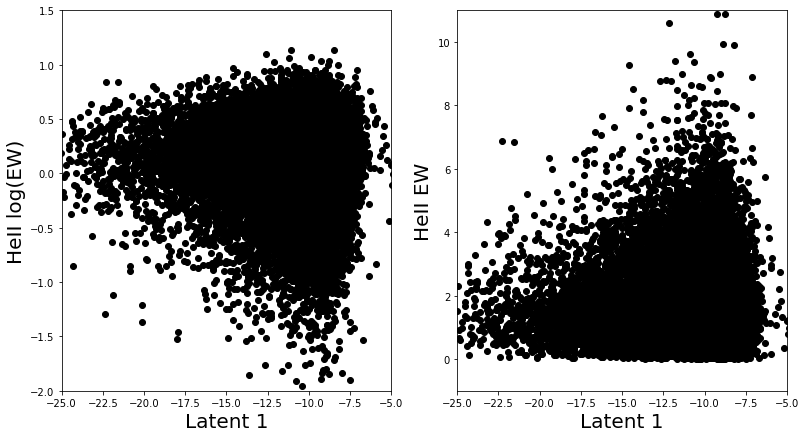

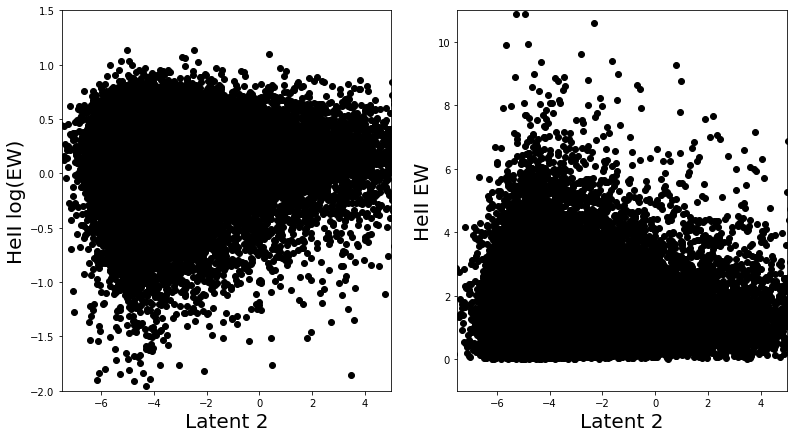

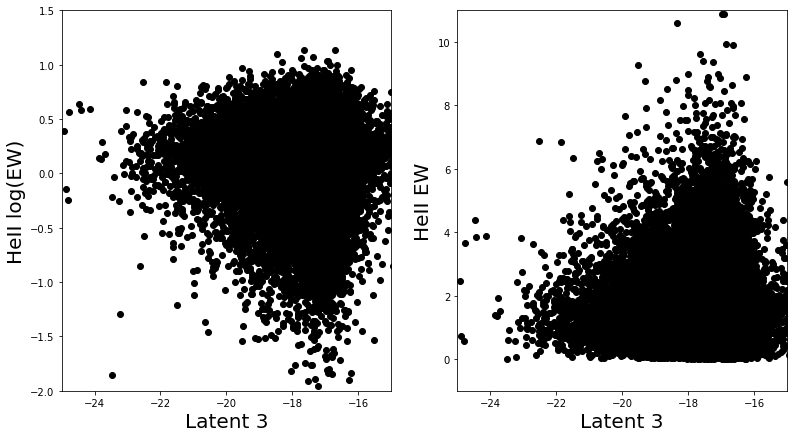

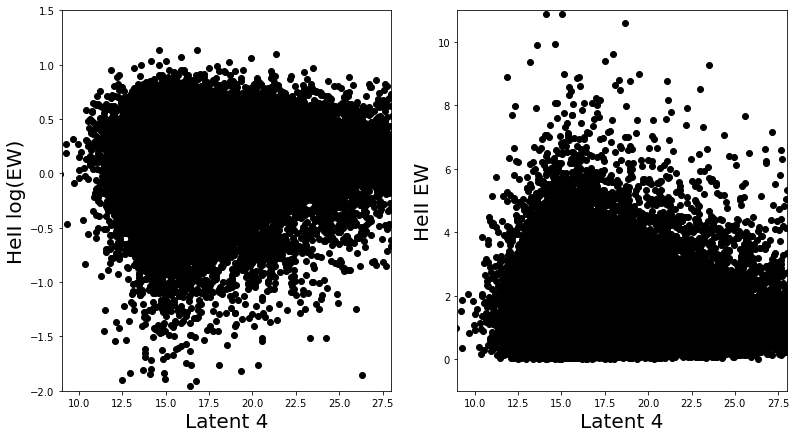

In [9]:
xlims_list = [ (0,0), (-25,-5), (-7.5,5), (-25,-15), (9,28) ]


for i in range(1, len(latent_params)+1):
    fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(13,7))

    ax1.scatter(latent_params[i][good], np.log10(HeII[good]), c="k")
    ax1.set_xlabel("Latent %d" % i, fontsize=20)
    ax1.set_ylabel("HeII log(EW)", fontsize=20)
    ax1.set_ylim(-2,1.5)
    ax1.set_xlim(xlims_list[i])

    ax2.scatter(latent_params[i][good], HeII[good], c="k")
    ax2.set_xlabel("Latent %d" % i, fontsize=20)
    ax2.set_ylabel("HeII EW", fontsize=20)
    ax2.set_ylim(-1,11)
    ax2.set_xlim(xlims_list[i])

    plt.show()

Run some clustering algorithm on the latent parameters to see if that tells us anything.  Not necessarily expecting it to "work", but let's see if it tells us anything useful.  Use Gordon's PHYS440 notebooks as a starting reference.

In [29]:
# Execute this cell
import numpy as np
from sklearn.cluster import KMeans

X = np.array(pd.DataFrame(latent_params))
clf = KMeans(n_clusters=3) #Try 3 clusters to start with
clf.fit(X)
centers=clf.cluster_centers_ #location of the clusters
labels=clf.predict(X) #labels for each of the points

In [30]:
good.sum(), len(dat)

(43209, 44863)

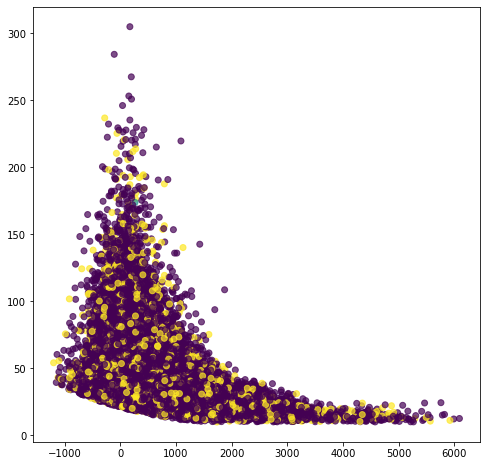

In [31]:
fig = plt.figure(figsize=(8,8))
plt.scatter(blue[good], EW[good], c=labels[good], alpha=0.7)
plt.show()

In [1]:
labels.sum()

NameError: name 'labels' is not defined

Not good!  Maybe scaling could help?